# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset collected is related to **17 campaigns** that occurred between May 2008 and November 2010.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [678]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image, display
import time

In [499]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import RocCurveDisplay

import multiprocessing
multiprocessing.set_start_method("forkserver", force=True)



In [501]:
import warnings
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning

warnings.simplefilter("ignore")
warnings.filterwarnings('always') 
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [503]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [505]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [508]:
# Summary statistics for numerical columns

df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [510]:
# Summary statistics for categorical columns

df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [512]:
df['y'].value_counts(normalize=True)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

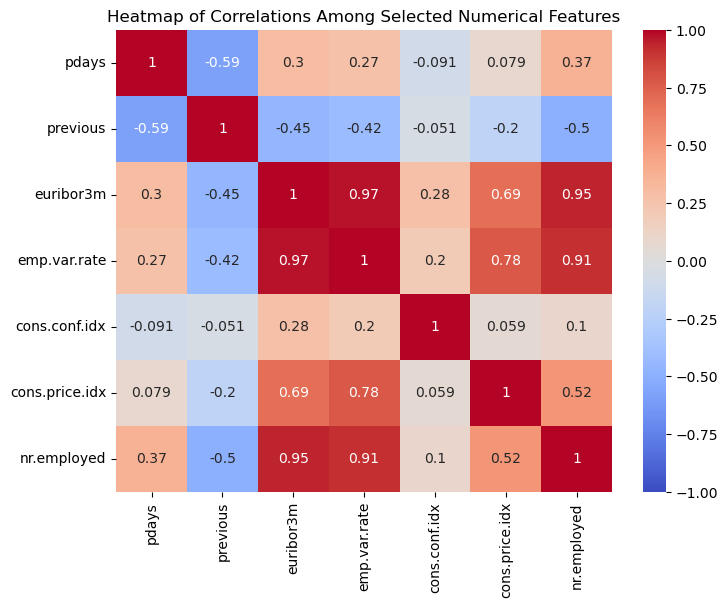

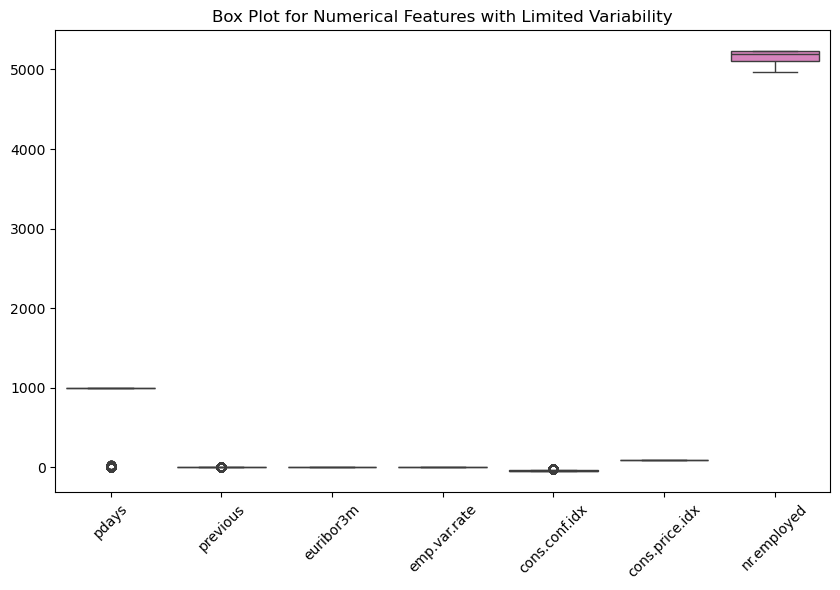

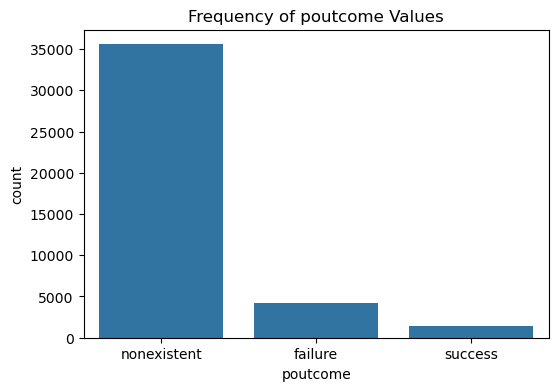

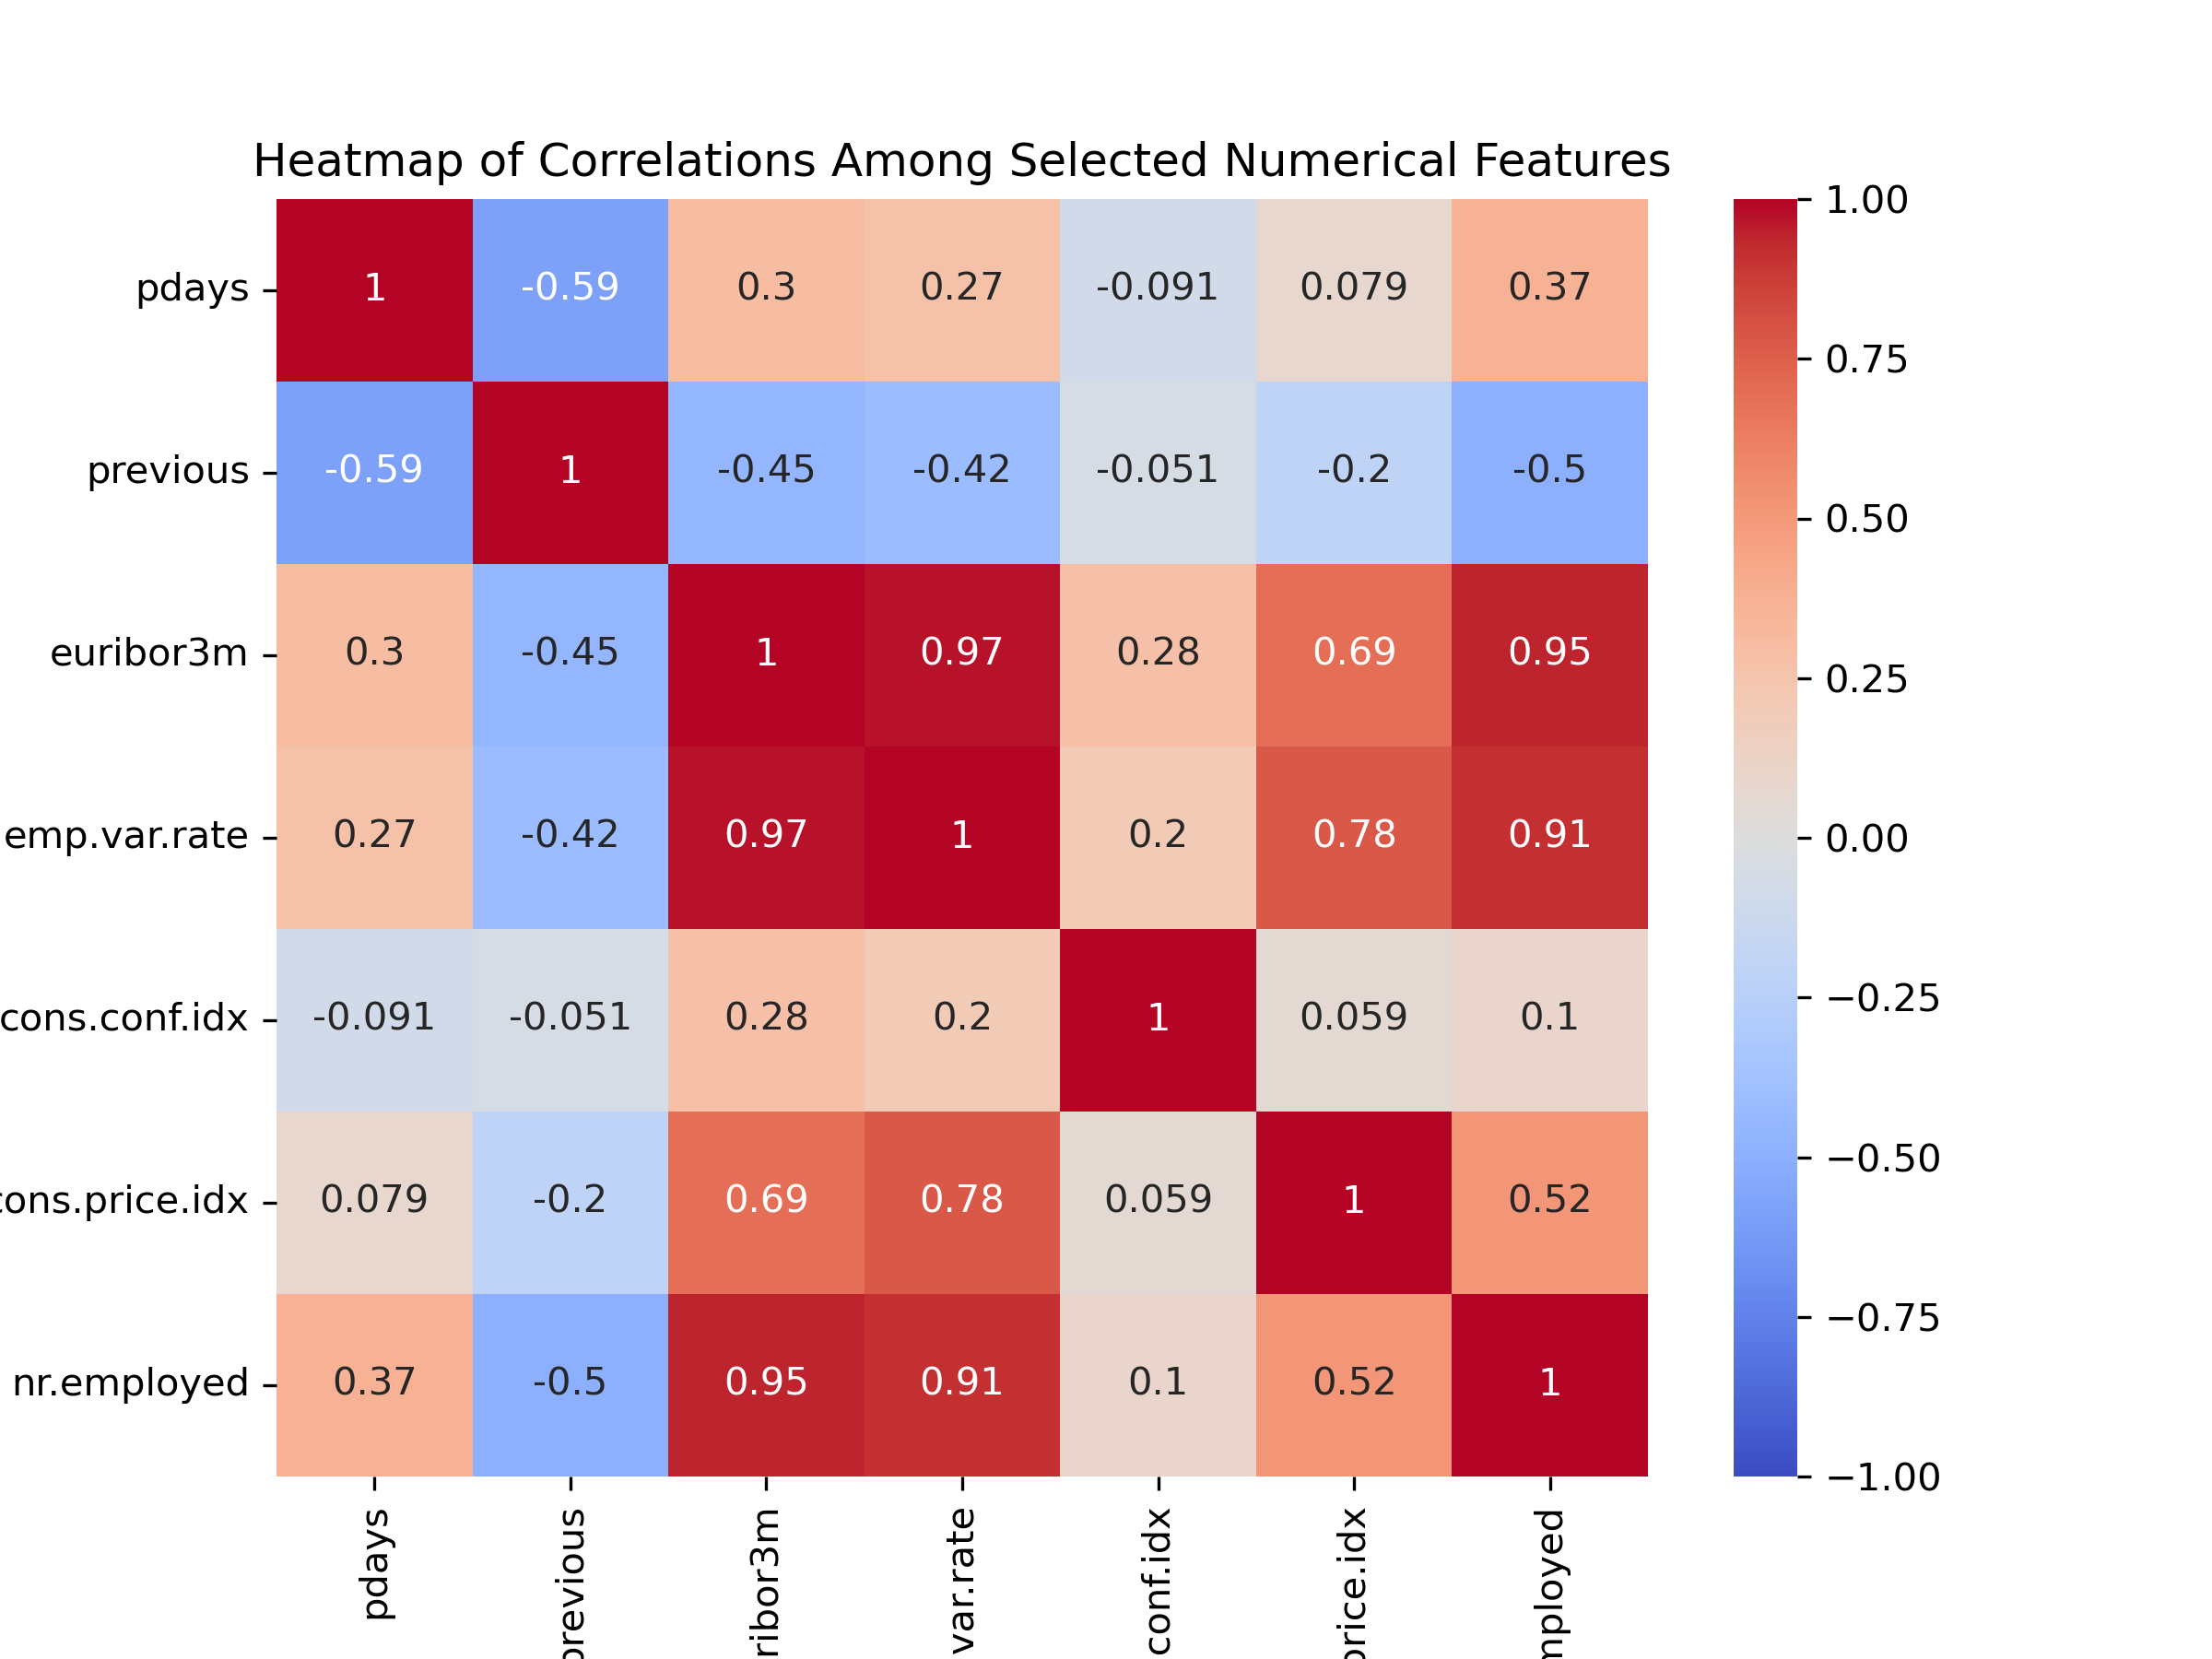

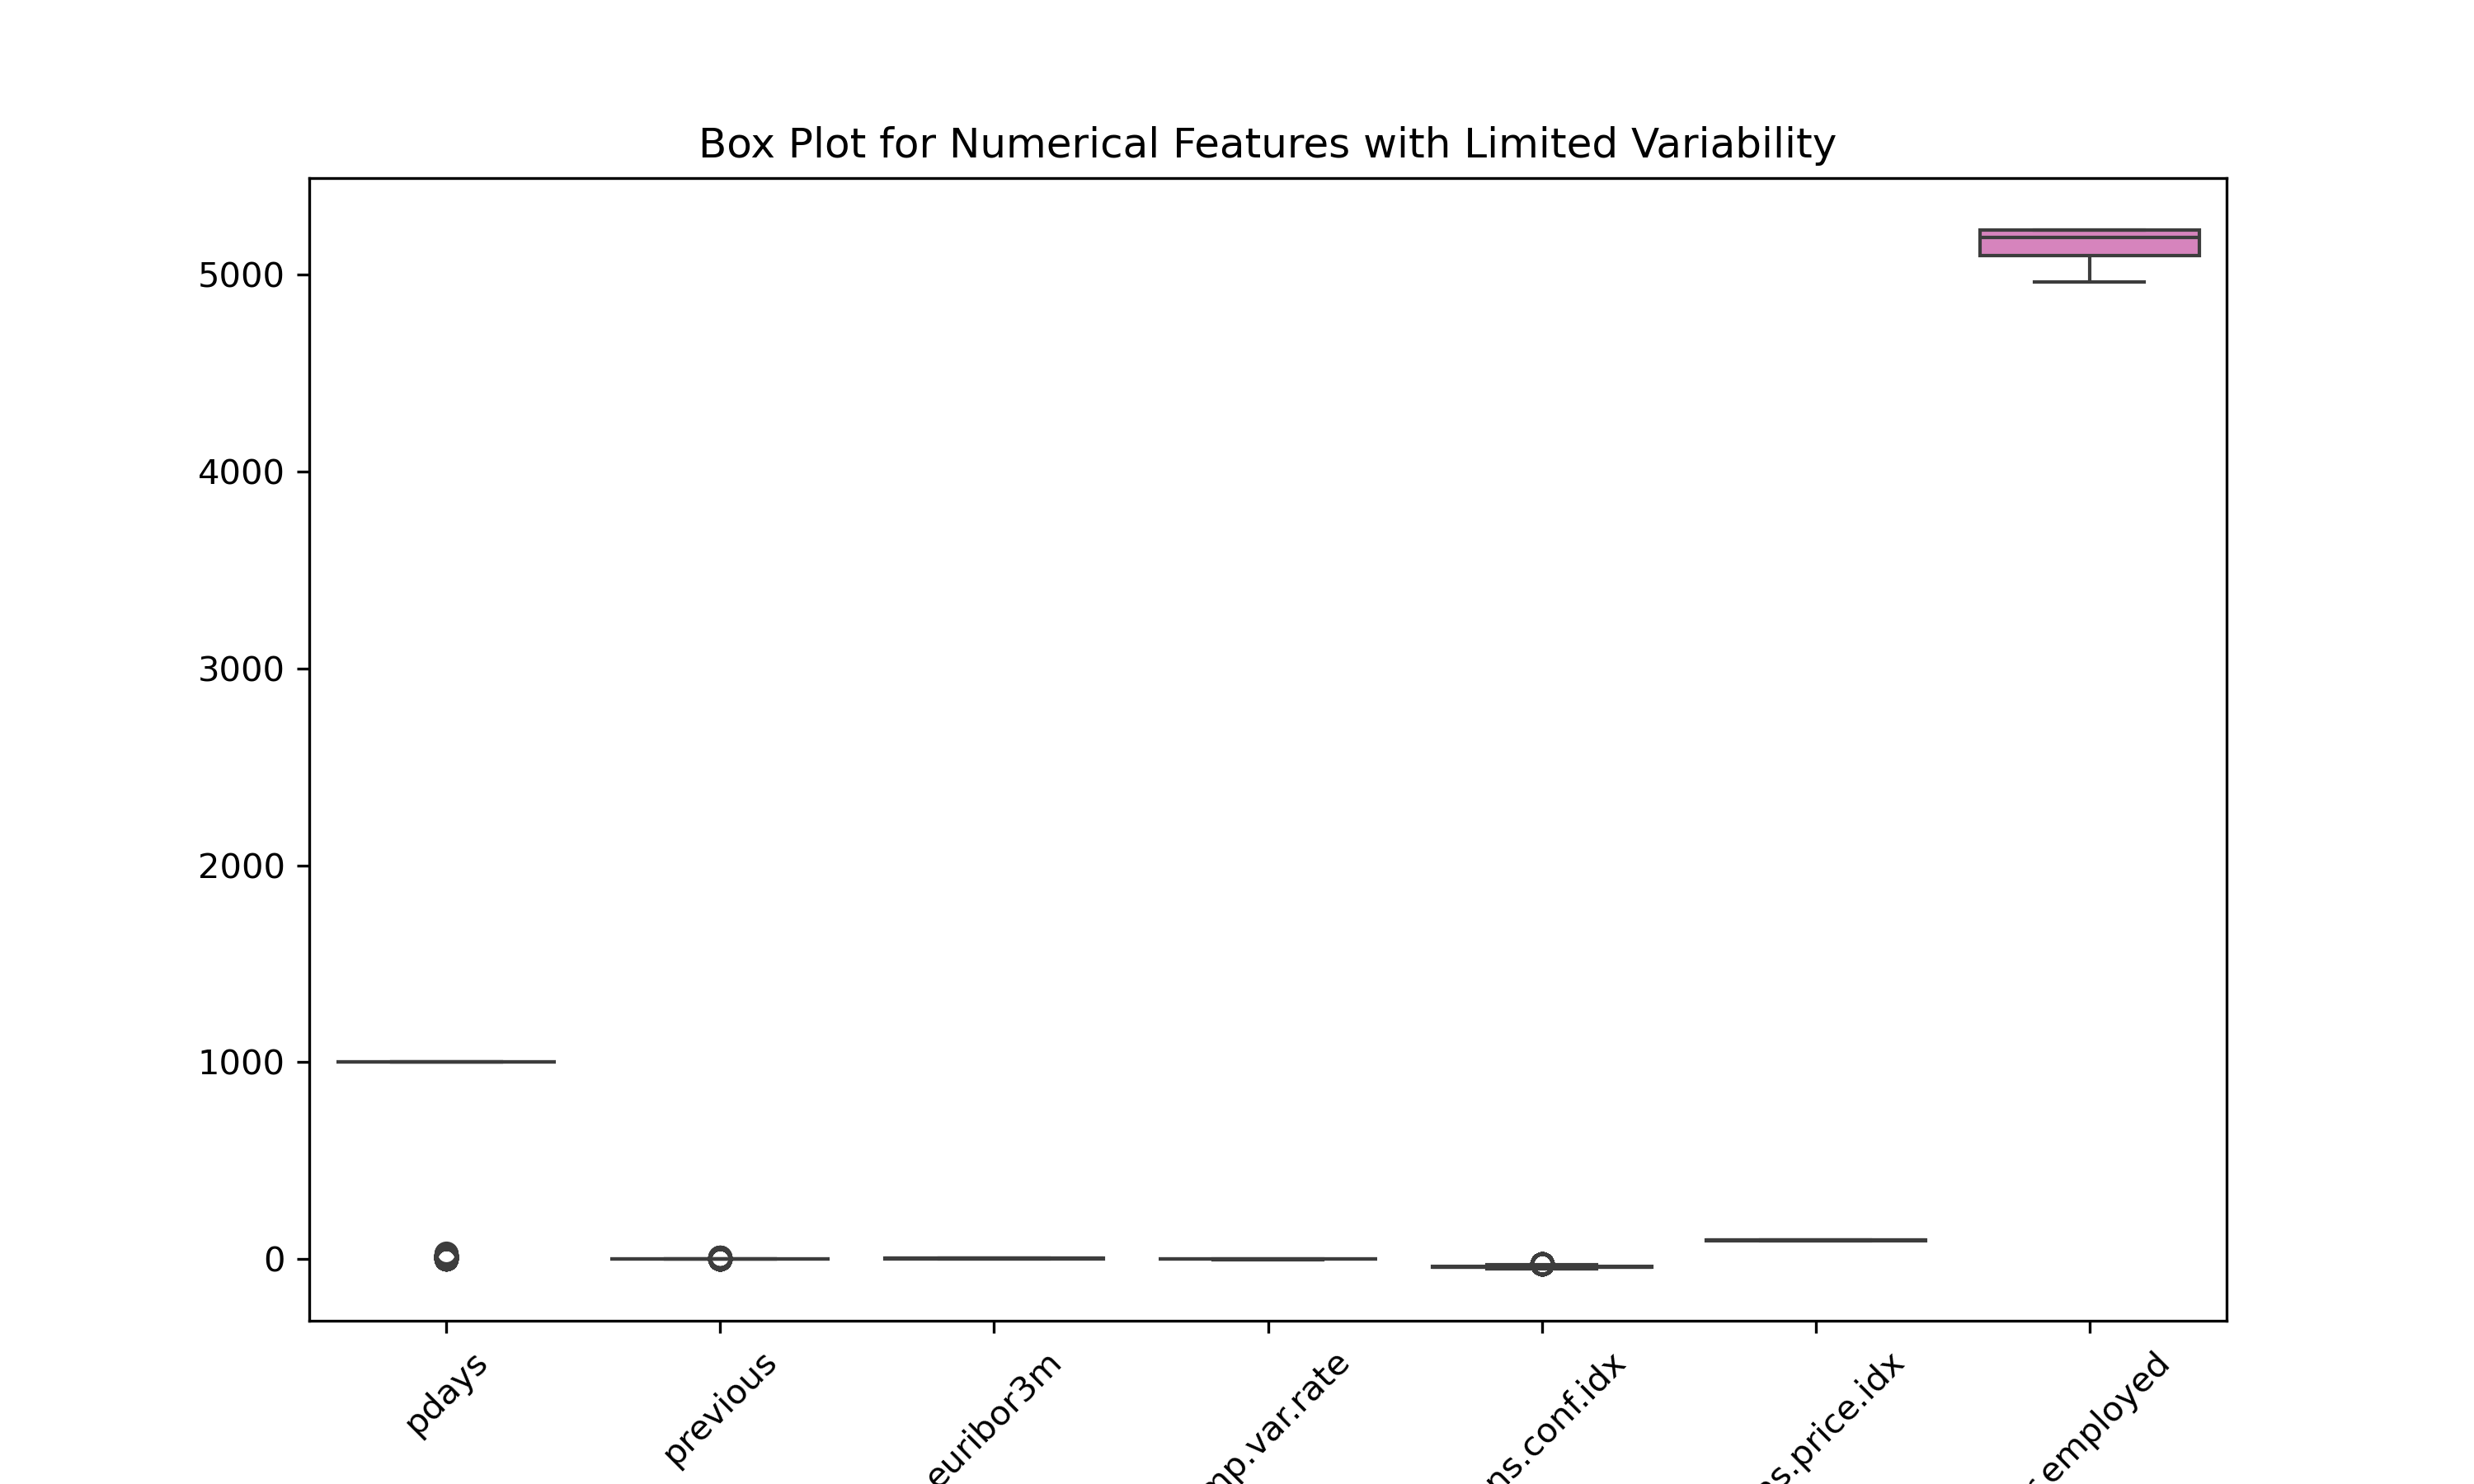

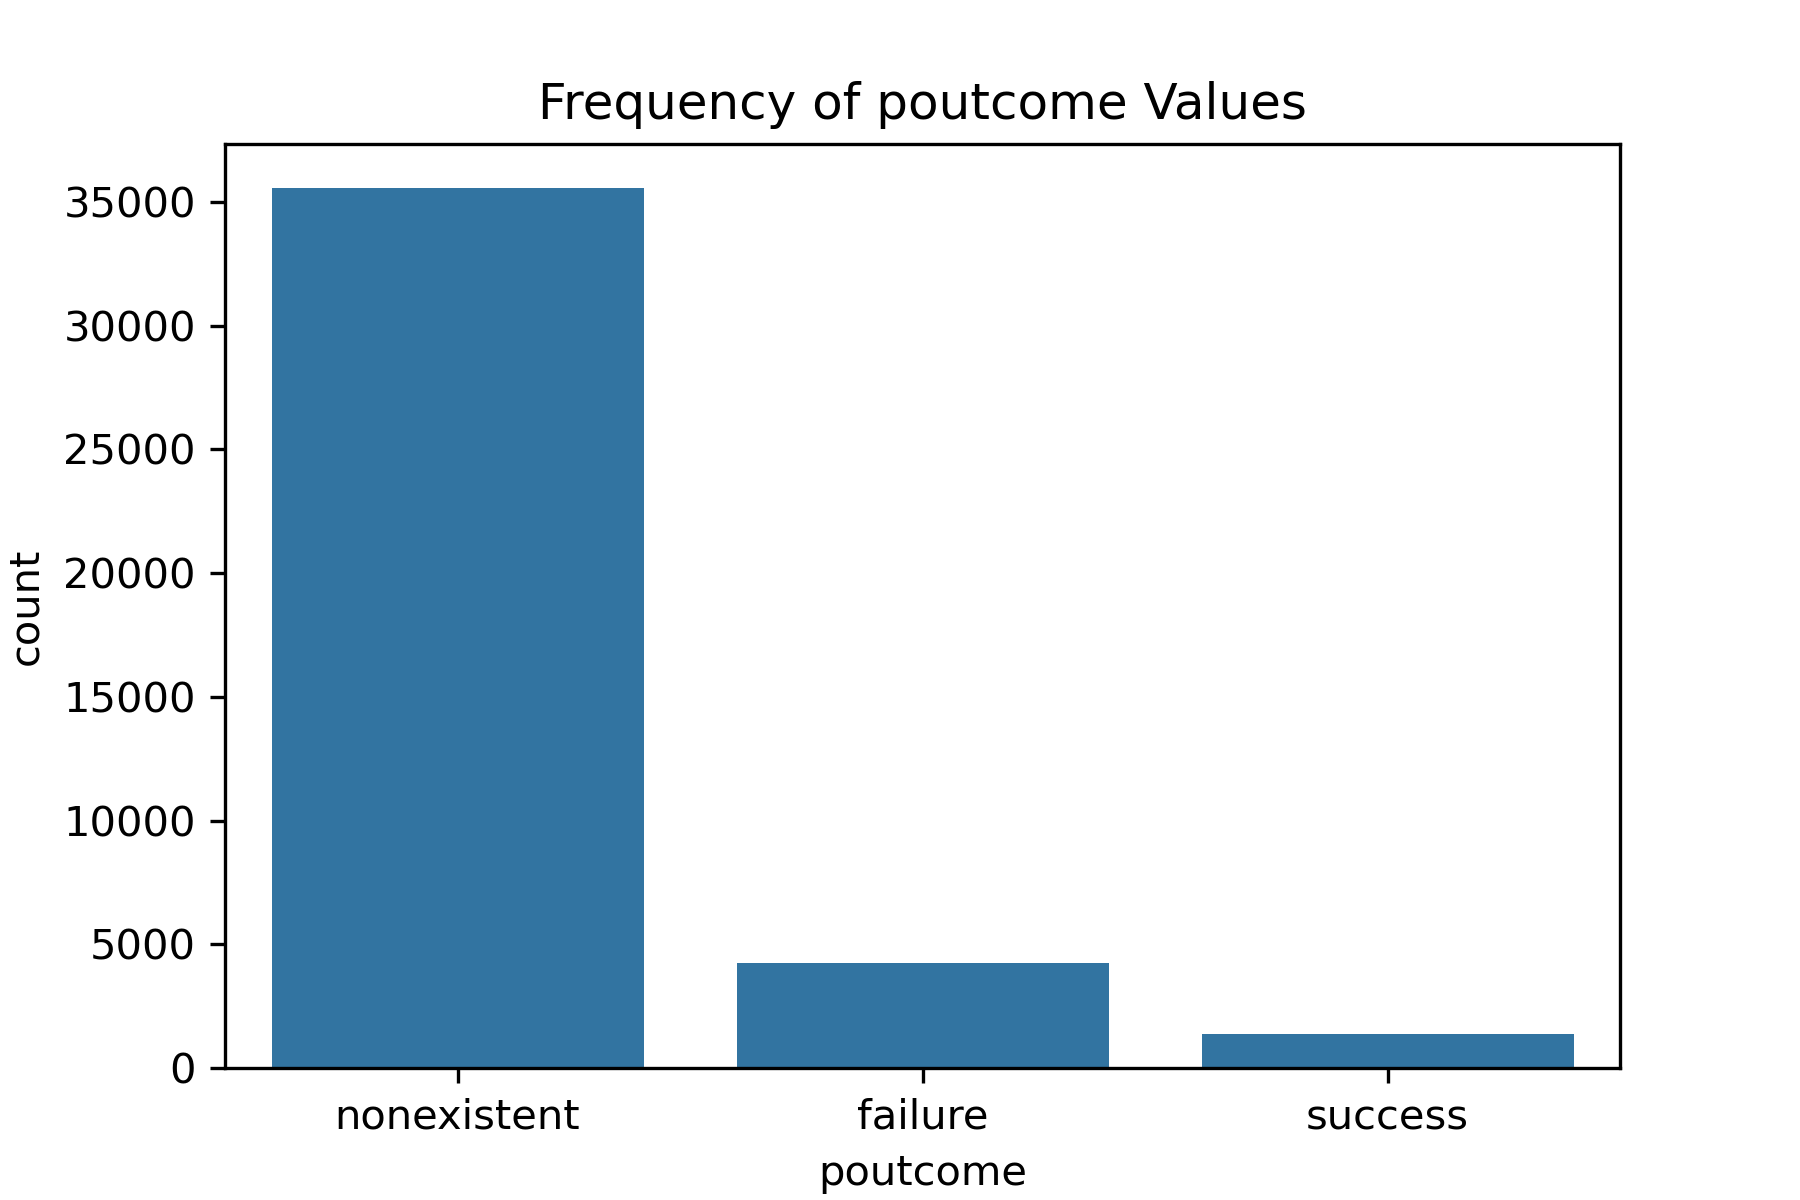

In [698]:
numerical_features = ['pdays', 'previous', 'euribor3m','emp.var.rate', 'cons.conf.idx','cons.price.idx', 'nr.employed']
categorical_features = ['poutcome']

# Heatmap of Correlations Among Selected Numerical Features
plt.figure(figsize=(8, 6))
correlation = df[numerical_features].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Heatmap of Correlations Among Selected Numerical Features")
plt.savefig("images/Heatmap of Correlations Among Selected Numerical Features.png", format="png", dpi=300)
plt.show()

# Box Plot for Numerical Features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_features])
plt.title("Box Plot for Numerical Features with Limited Variability")
plt.xticks(rotation=45)
plt.savefig("images/Box Plot for Numerical Features with Limited Variability.png", format="png", dpi=300)
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='poutcome')
plt.title(f"Frequency of poutcome Values")
plt.savefig("images/Frequency of poutcome.png", format="png", dpi=300)
plt.show()

display(Image(filename='images/Heatmap of Correlations Among Selected Numerical Features.png'))
display(Image(filename='images/Box Plot for Numerical Features with Limited Variability.png'))
display(Image(filename='images/Frequency of poutcome.png'))

### Feature Understanding
#### No Null Values: 

    Most of the null values are already marked as UNKNOWN for each column. Not ncessary to assign these values with the mean value of the columns. That will skew the data. 
    
    There are few columns like 'pdays', 'previous', 'nr.employed' can be removed as their mean value is almost same as the 25,50,75, and max percentages. Meaning no impact. But removing also will not impact the modeling.
     
    No cleaning, no replacing, no co-ercing needed for any of the columns.

    Target data is not equally distributed. No is 89% and Yes is 11%

    Looking at the heat map there are strong correlation between 'euribor3m','emp.var.rate','cons.price.idx', 'nr.employed'. Using just 'euribor3m' will be a representative of other fields. 

    Also 'poutcome' does not add any value, 83% customers were never contacted before. So this field also does not add any value.

    As this whole data set has imblanced target class it is not possible to clearly separate out the columns not needed. 

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Business Objective

Our business objective is to develop a model that can predict the success of client contact, specifically whether a client subscribes to the deposit. This model will boost campaign efficiency by pinpointing key factors influencing success, enabling better resource management (such as personnel, calls, and time) and helping to target a high-quality, cost-effective pool of potential customers.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [700]:
# Preparing Feature and Target Columns

X = df.drop(columns = ['y'], axis=1)
y = df['y'].map({'yes':1, 'no':0})

In [702]:
# Splitting numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

In [704]:
# Column Transformer for applying StandardScaler and OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [707]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

Use 'most_frequent' strategy for imbalanced target variable. Probability of picking most frequent class for baseline prediction. For our use case I am using this strategy. This strategy gives a precision score of YES 100% and NO 89%.

Use 'uniform' strategy when target variable is balanced. Gives equal probability of being picked. This strategy gives a precision score of 12% predicting YES.

This baseline accuracy and classification report provide a minimum performance threshold. Any model we develop should aim to outperform this baseline. By focusing on key metrics such as accuracy, precision or F1-score, we can clearly assess whether our models are meaningfully better than random or naïve predictions.

Additionally evaluated AUC and ROC Curve to measure performance of binary classifier for imbalanced classes. 

The ROC Curve plots the True Positive Rate (Recall) against the False Positive Rate at various thresholds, showing how the classifier’s performance changes as the decision boundary varies.

For AUC, by default the score is 0.5 if the predictions are positive and with Dummy Classifiers we notice the same.

We will be comparing this for every model below.



In [713]:
dummyClassifier = DummyClassifier(strategy="most_frequent")

#dummyClassifier = DummyClassifier(strategy="uniform")

dummyClassifier.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [715]:
yDummyClassifierPred = dummyClassifier.predict(X_test)
baselineAccuracy = accuracy_score(y_test, yDummyClassifierPred)

In [717]:
print("Baseline Accuracy (Most Frequent Class):", baselineAccuracy)
print("Baseline Classification Report:\n", classification_report(y_test, yDummyClassifierPred, zero_division=1))

Baseline Accuracy (Most Frequent Class): 0.8873512988589464
Baseline Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      7310
           1       1.00      0.00      0.00       928

    accuracy                           0.89      8238
   macro avg       0.94      0.50      0.47      8238
weighted avg       0.90      0.89      0.83      8238



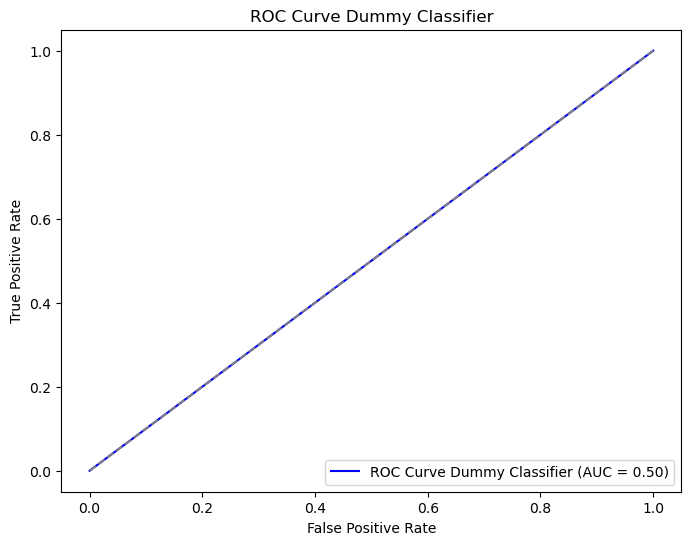

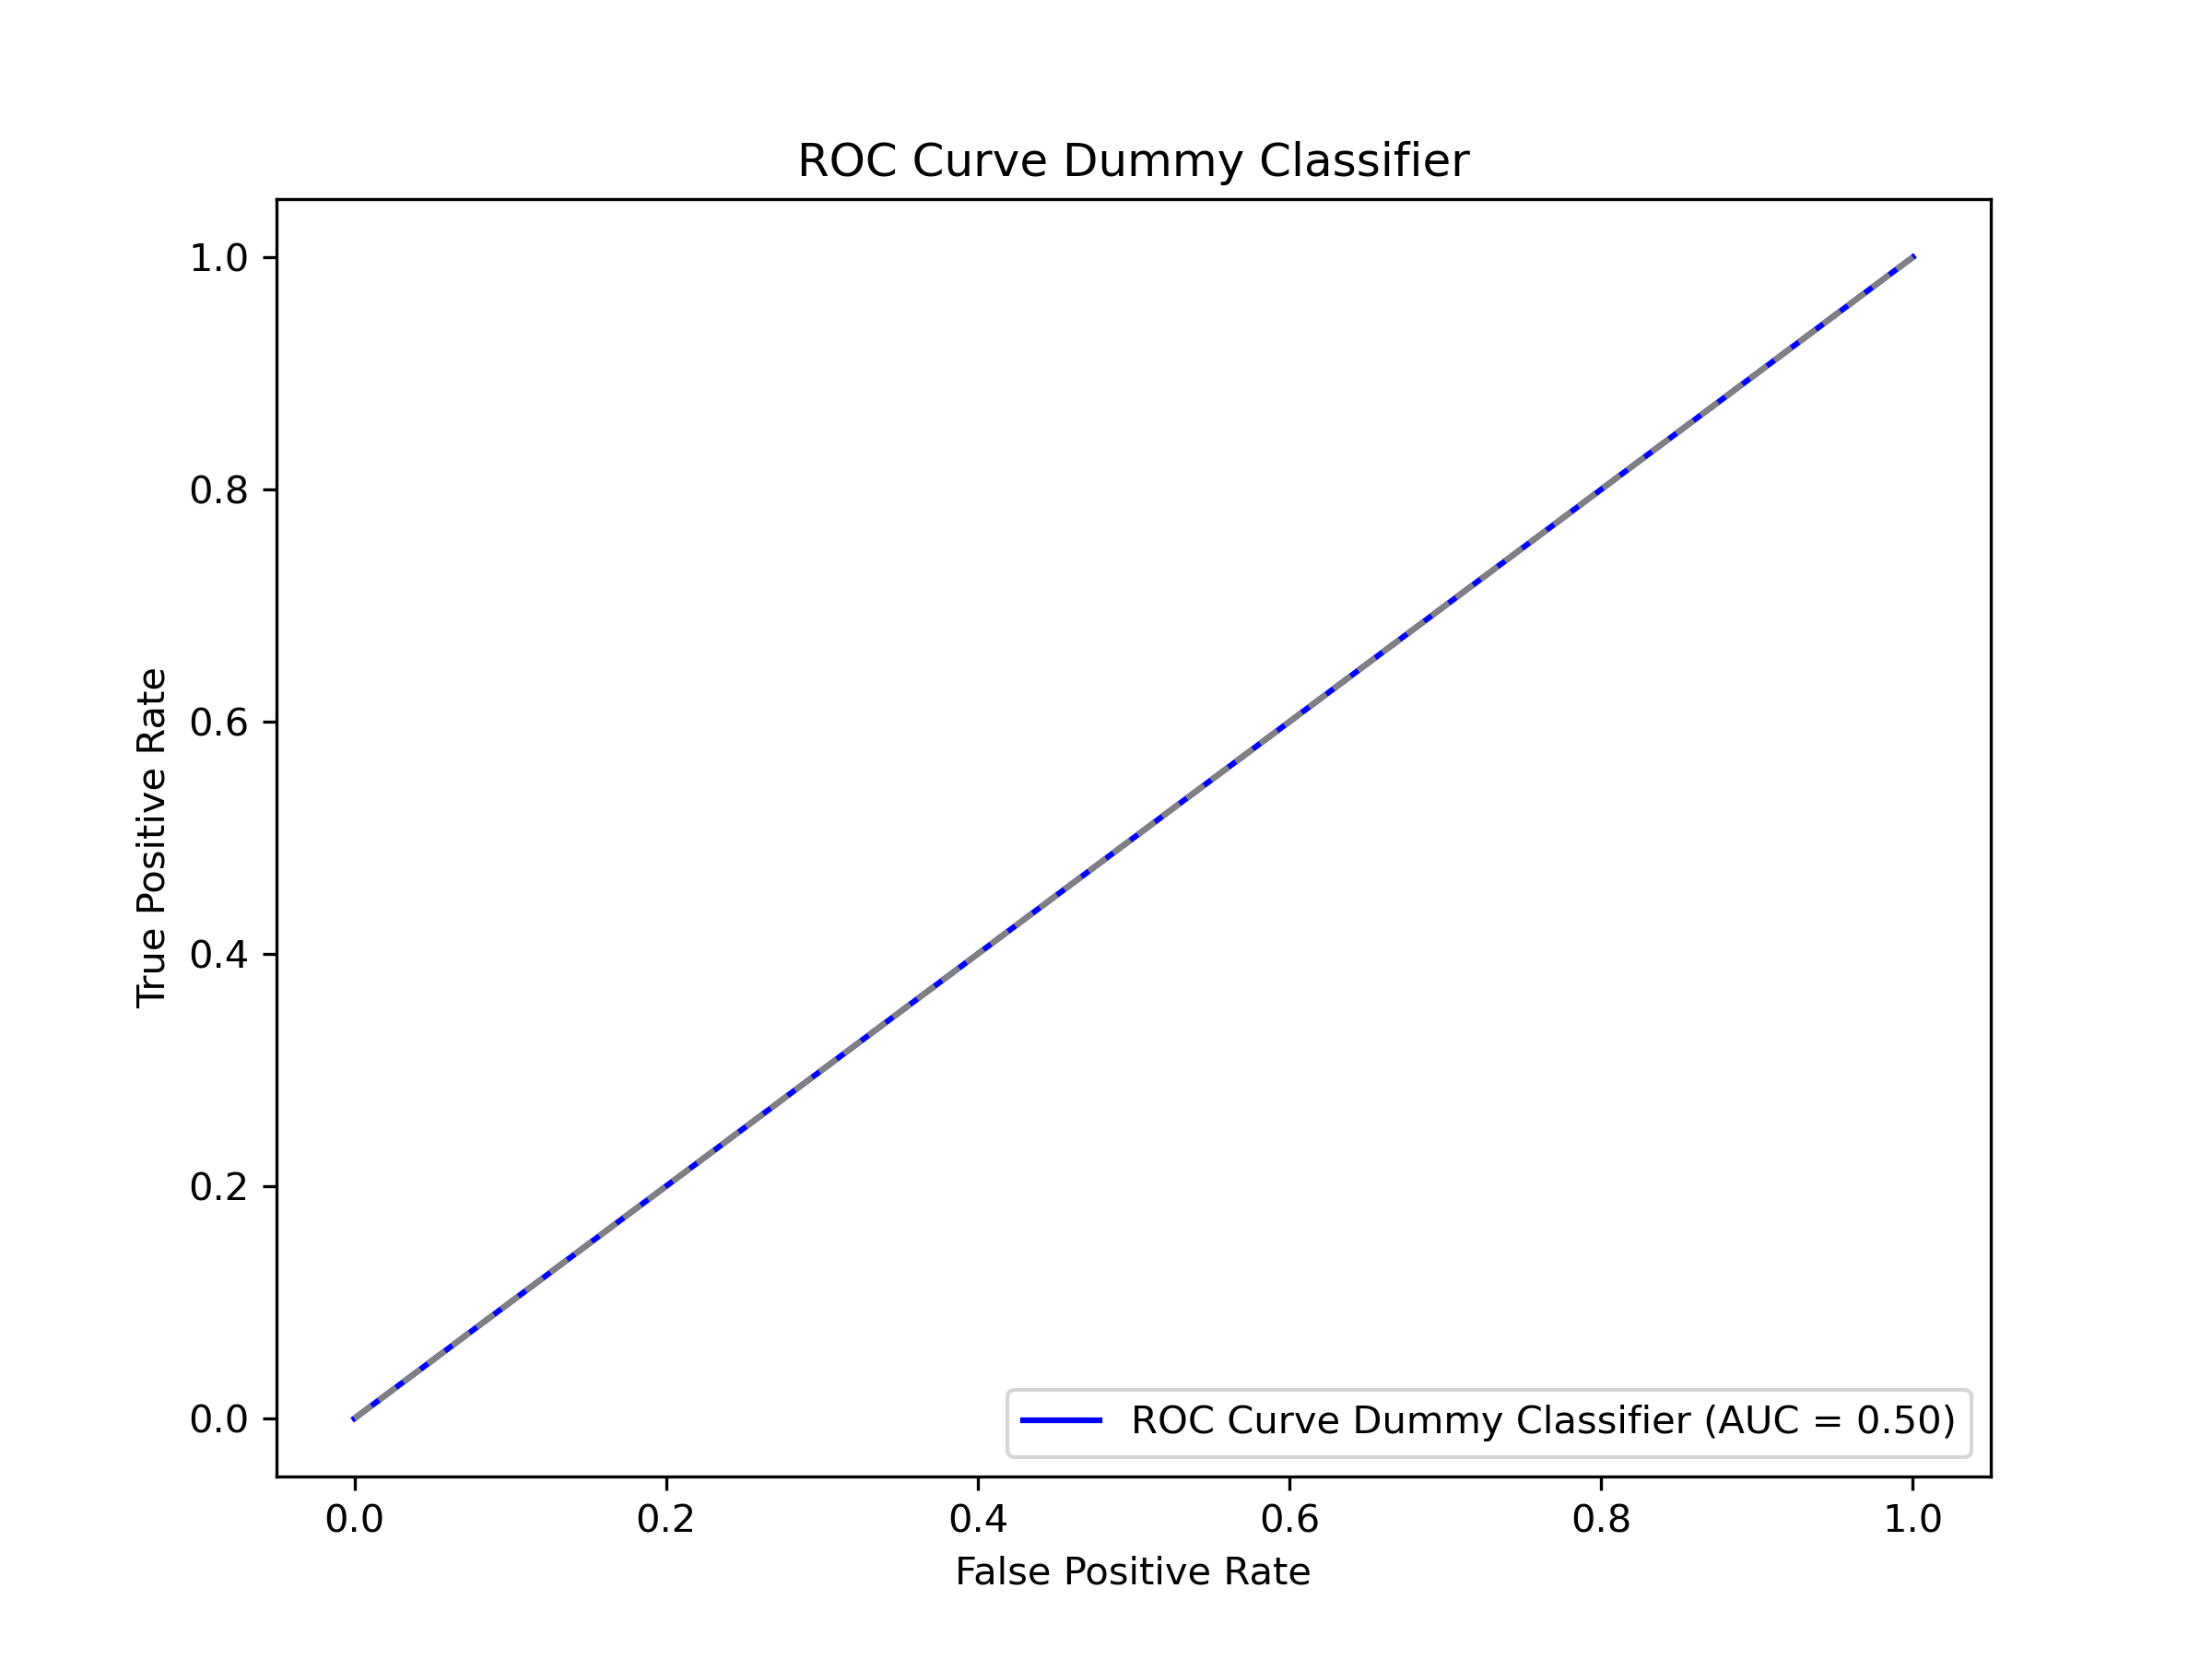

In [721]:
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, yDummyClassifierPred)
roc_auc = auc(fpr, tpr)

#Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve Dummy Classifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Dummy Classifier")
plt.legend(loc="lower right")
plt.savefig("images/ROC Curve Dummy Classifier with AUC.png", format="png", dpi=300)
plt.show()

display(Image(filename='images/ROC Curve Dummy Classifier with AUC.png'))

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [724]:
simpleLogistic = LogisticRegression()

simplePipe = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', simpleLogistic)
])

simplePipe.fit(X_train, y_train)

ySimplePred = simplePipe.predict(X_test)

### Problem 9: Score the Model

What is the accuracy of your model?

Comparing to the baseline precision score went down predicting YES (71%) where as predicting NO (93%) has improved.

Recal scores and F1 scores also showed improvement predicting YES (43% and 54%). Note: Baseline scores were 0% for both these.

AUC: 0.71 which is representing positive prediction and better than the baseline.

Simple Logictic Regression Model did improve the prediction rate overall.



In [728]:
# Accuracy and Classification Report
simpleLogicticAccuracy = accuracy_score(y_test, ySimplePred)
print("Simple Logictic Model Accuracy :", simpleLogicticAccuracy)
print("Simple Logictic Classification Report:\n", classification_report(y_test, ySimplePred, zero_division=1))

Simple Logictic Model Accuracy : 0.9135712551590192
Simple Logictic Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.70      0.41      0.52       928

    accuracy                           0.91      8238
   macro avg       0.81      0.69      0.74      8238
weighted avg       0.90      0.91      0.90      8238



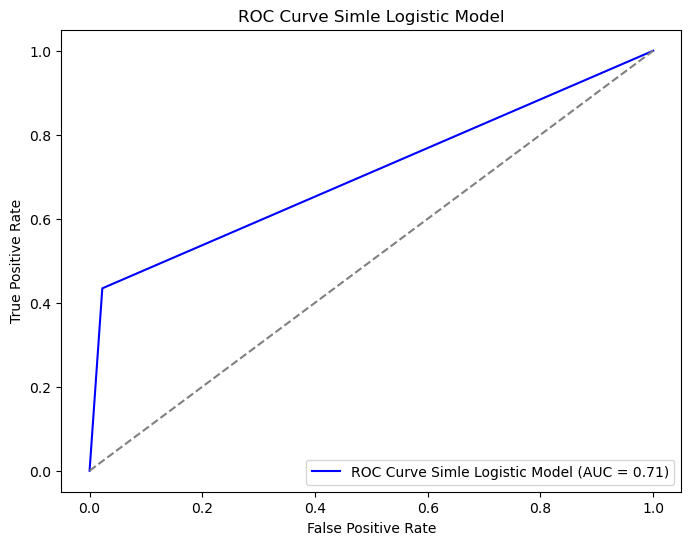

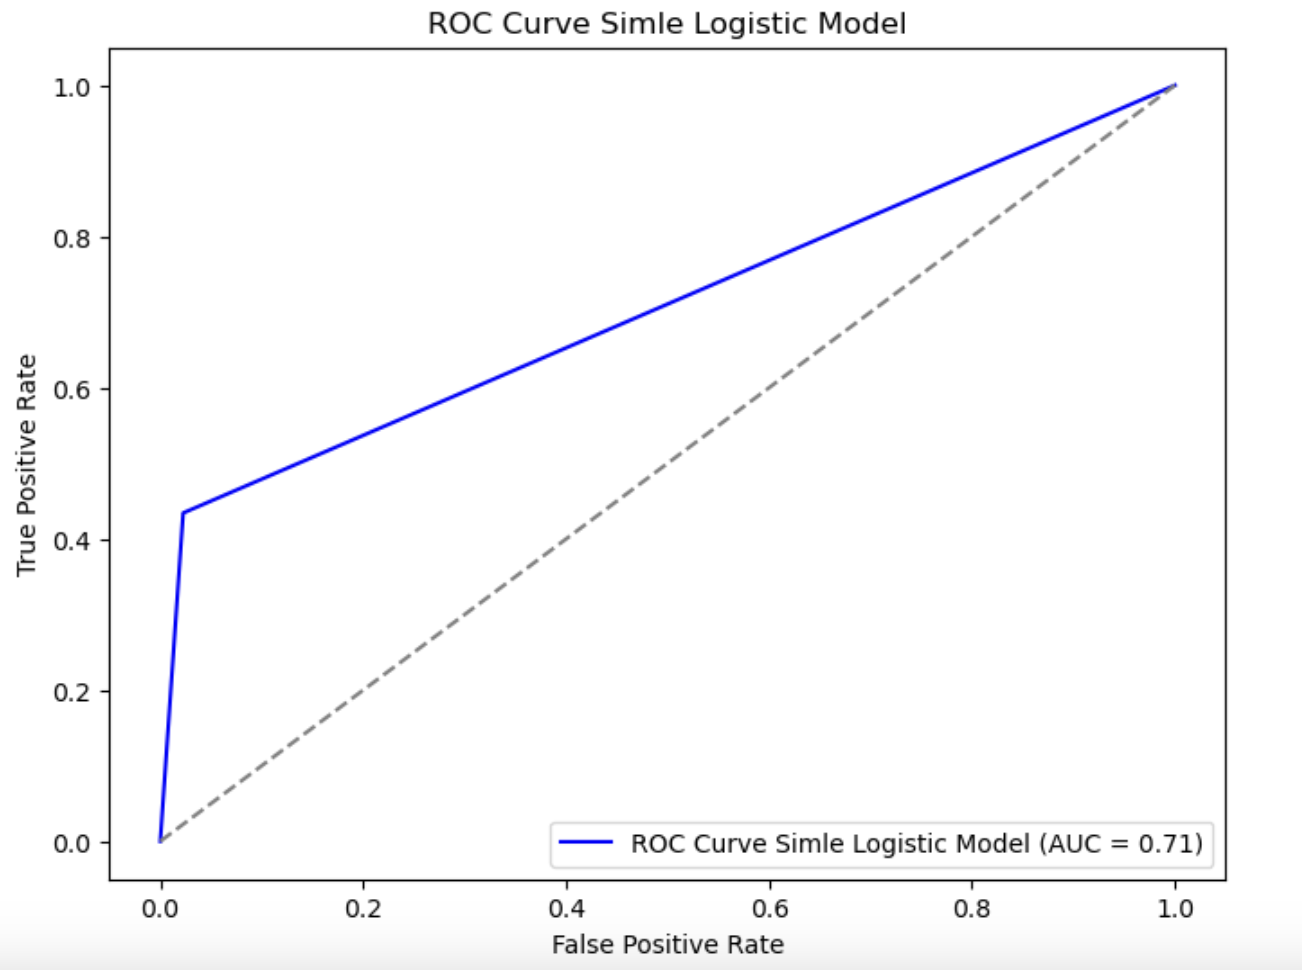

In [550]:
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, ySimplePred)
roc_auc = auc(fpr, tpr)

#Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve Simle Logistic Model (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Simle Logistic Model")
plt.legend(loc="lower right")
plt.show()

display(Image(filename='images/ROC Curve Simle Logistic Model with AUC.png'))

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [553]:
# Define classifiers to compare
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Initialize lists to store results
training_times = {}
predictions = {}
accuracy = {}

# DataFrame for models
model_findings = pd.DataFrame(columns=['Train Time', 'Training Accuracy', 'Testing Accuracy'])

model_findings_acc = pd.DataFrame(columns=['Train Time', 'Training Accuracy', 'Testing Accuracy', 'Acc Score'])


In [555]:
# Iterate over the classifiers
for name, clf in classifiers.items():
    print(f"Evaluating: {name}")

    pipe = Pipeline(steps = [
            ('preprocessor', preprocessor),
            ('classifier', clf)
        ])
    
    # Time the training process
    start_time = time.time()
    pipe.fit(X_train, y_train)
    end_time = time.time()
    training_times[name] = end_time - start_time
    
    # Predictions and performance metrics
    y_train_pred = pipe.predict(X_train) 
    y_test_pred = pipe.predict(X_test)   
    
    # Get Predictions
    predictions[name] = y_test_pred

    # Accuracy and Classification Report
    accuracy[name] = accuracy_score(y_test, y_test_pred)

    
    # AUC and ROC for Training and Test
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train) 
    
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)

    #Plot the ROC Curve
    #plt.figure(figsize=(8, 6))
    #plt.plot(fpr_test, tpr_test, color='blue', label=f' ROC Curve ({name}, AUC = {roc_auc_test:.2f})')
    #plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
    #plt.xlabel("False Positive Rate")
    #plt.ylabel("True Positive Rate")
    #plt.title(f"ROC Curve for {name}")
    #plt.legend(loc="lower right")
    #plt.show()

    # Update Dataframe
    model_findings.loc[name] = [training_times[name], roc_auc_train, roc_auc_test]
    model_findings_acc.loc[name] = [training_times[name], roc_auc_train, roc_auc_test, accuracy[name]]



Evaluating: Logistic Regression
Evaluating: SVM
Evaluating: KNN
Evaluating: Decision Tree


In [556]:
model_findings

,Train Time,Training Accuracy,Testing Accuracy
Logistic Regression,0.156548,0.693823,0.705848
SVM,5.793781,0.718031,0.698510
KNN,0.040754,0.771954,0.699607
Decision Tree,0.169039,1.000000,0.744142


In [559]:
model_findings_acc

,Train Time,Training Accuracy,Testing Accuracy,Acc Score
Logistic Regression,0.156548,0.693823,0.705848,0.916242
SVM,5.793781,0.718031,0.698510,0.914907
KNN,0.040754,0.771954,0.699607,0.903496
Decision Tree,0.169039,1.000000,0.744142,0.894877


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Summary of Model Improvement

Gender feature has already been analyzed in the paper, which proves that Gender is not a major factor to determine a client subscribes to the deposit.

Hyperparameter tuning can be done via Grid Search. 
- KNN = n_neighbors {2,3,5,7,11} 
- Decision Tree = max_depth {None, 1, 3, 5, 7}, max_sample_split {2, 5, 10}
- Logistic Regression = C, penalty {l1, l2}
- SVC = C, kernal {'linear', 'rbf', 'sigmoid'}

Based on the grid search we can pick the best model and find the AUC and ROC to compare the model performance.


Decision Tree has the highest overall accuracy at 91.9% and performs consistently between training and testing.
 
SVM has good accuracy at 91.1% but a very high computation time (1274 seconds).
 
KNN achieves a strong balance with 90.9% accuracy and the lowest fit time (1.2 seconds).
 
Logistic Regression has moderate performance with 90.7% accuracy but lower training/testing accuracy.

In [657]:
# Define classifiers to compare
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

# Initialize lists to store results
training_times = {}
predictions = {}
accuracy = {}
results = {}
bestParam = {}

In [659]:
param_grids = {
    "Logistic Regression": {
        'param__C': [0.001, 0.01, 0.1, 1, 10],
        'param__penalty': ['l1', 'l2'],
        'param__solver': ['liblinear', 'saga'],
        #'param__class_weight': ['balanced', None],
        'param__max_iter': [1000, 5000, 10000]
    },
    "KNN": {
        'param__n_neighbors': [2, 3, 5, 7, 11],
        'param__weights': ['uniform', 'distance'],
        'param__algorithm': ['auto', 'kd_tree', 'brute']
    },
    "Decision Tree": {
        'param__max_depth': [None] +[1, 3, 5],
        'param__min_samples_split': [2, 5, 10],
        'param__min_samples_leaf': [1, 2, 3],
        #'param__class_weight': ['balanced', None]
    },
    "SVM": {
        'param__C': [0.1, 1, 10],
        'param__kernel': ['linear','rbf'],
        'param__gamma': ['scale', 'auto'] + [0.1, 1, 10],
        #'param__class_weight': ['balanced', None]
    }
}

In [661]:
for name, model in classifiers.items():
    print(f"Evaluating: {name}")

    pipe = Pipeline(steps = [
            ('preprocessor', preprocessor),
            ('param', model)
        ])

    gridSearchCV = GridSearchCV(pipe, param_grids[name], scoring='precision', cv=5)
    
    
    gridSearchCV.fit(X_train, y_train)
    
    # Print the results
    print(f"Best Score for {name}: {gridSearchCV.best_score_}")
    print(f"Best Parameters for {name}: {gridSearchCV.best_params_}\n")

    bestParam[name] = gridSearchCV.best_params_
    
    # Predictions and performance metrics
    y_train_pred = gridSearchCV.best_estimator_.predict(X_train) 
    y_test_pred = gridSearchCV.best_estimator_.predict(X_test)   
    
    # Get Predictions
    predictions[name] = y_test_pred

    # Accuracy and Classification Report
    
    #precision_score(y_test, y_test_pred, zero_division=1)
    accuracy[name] = accuracy_score(y_test, y_test_pred)

    
    # AUC and ROC for Training and Test
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train) 
    
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)

    #Plot the ROC Curve
    #plt.figure(figsize=(8, 6))
    #plt.plot(fpr_test, tpr_test, color='blue', label=f' ROC Curve ({name}, AUC = {roc_auc_test:.2f})')
    #plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
    #plt.xlabel("False Positive Rate")
    #plt.ylabel("True Positive Rate")
    #plt.title(f"ROC Curve for {name}")
    #plt.legend(loc="lower right")
    #plt.show()

    results[name] = {
        'best_score': gridSearchCV.best_score_,
        'mean_fit_time': gridSearchCV.cv_results_['mean_fit_time'].sum(),
        'roc_auc_train':roc_auc_train,
        'roc_auc_test':roc_auc_test,
        'accuracy':accuracy_score(y_test, y_test_pred)
    }

Evaluating: Logistic Regression
Best Score for Logistic Regression: 0.7111318799344847
Best Parameters for Logistic Regression: {'param__C': 0.001, 'param__max_iter': 1000, 'param__penalty': 'l1', 'param__solver': 'liblinear'}

Evaluating: KNN
Best Score for KNN: 0.6092682835107748
Best Parameters for KNN: {'param__algorithm': 'auto', 'param__n_neighbors': 11, 'param__weights': 'uniform'}

Evaluating: Decision Tree
Best Score for Decision Tree: 0.6385486257129995
Best Parameters for Decision Tree: {'param__max_depth': 5, 'param__min_samples_leaf': 1, 'param__min_samples_split': 2}

Evaluating: SVM
Best Score for SVM: 0.6752358279234676
Best Parameters for SVM: {'param__C': 1, 'param__gamma': 'auto', 'param__kernel': 'rbf'}



### To avoid long text I have hidden the plot creation step from the Grid Search and just added the images below.

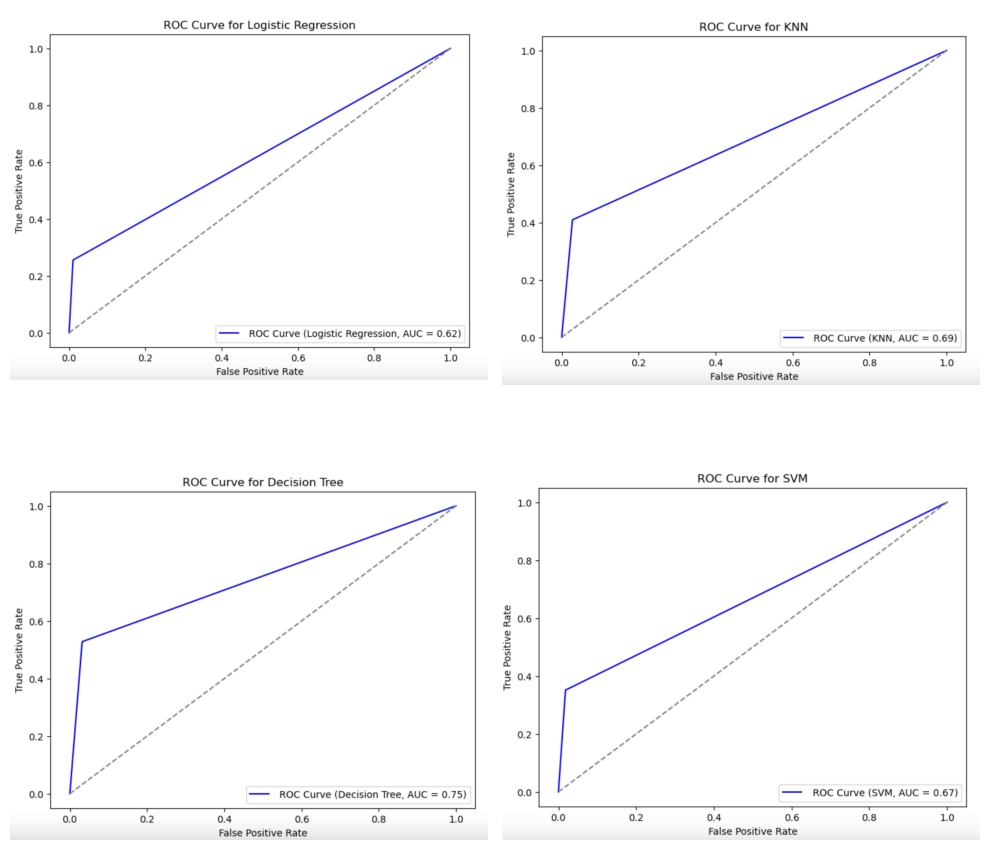

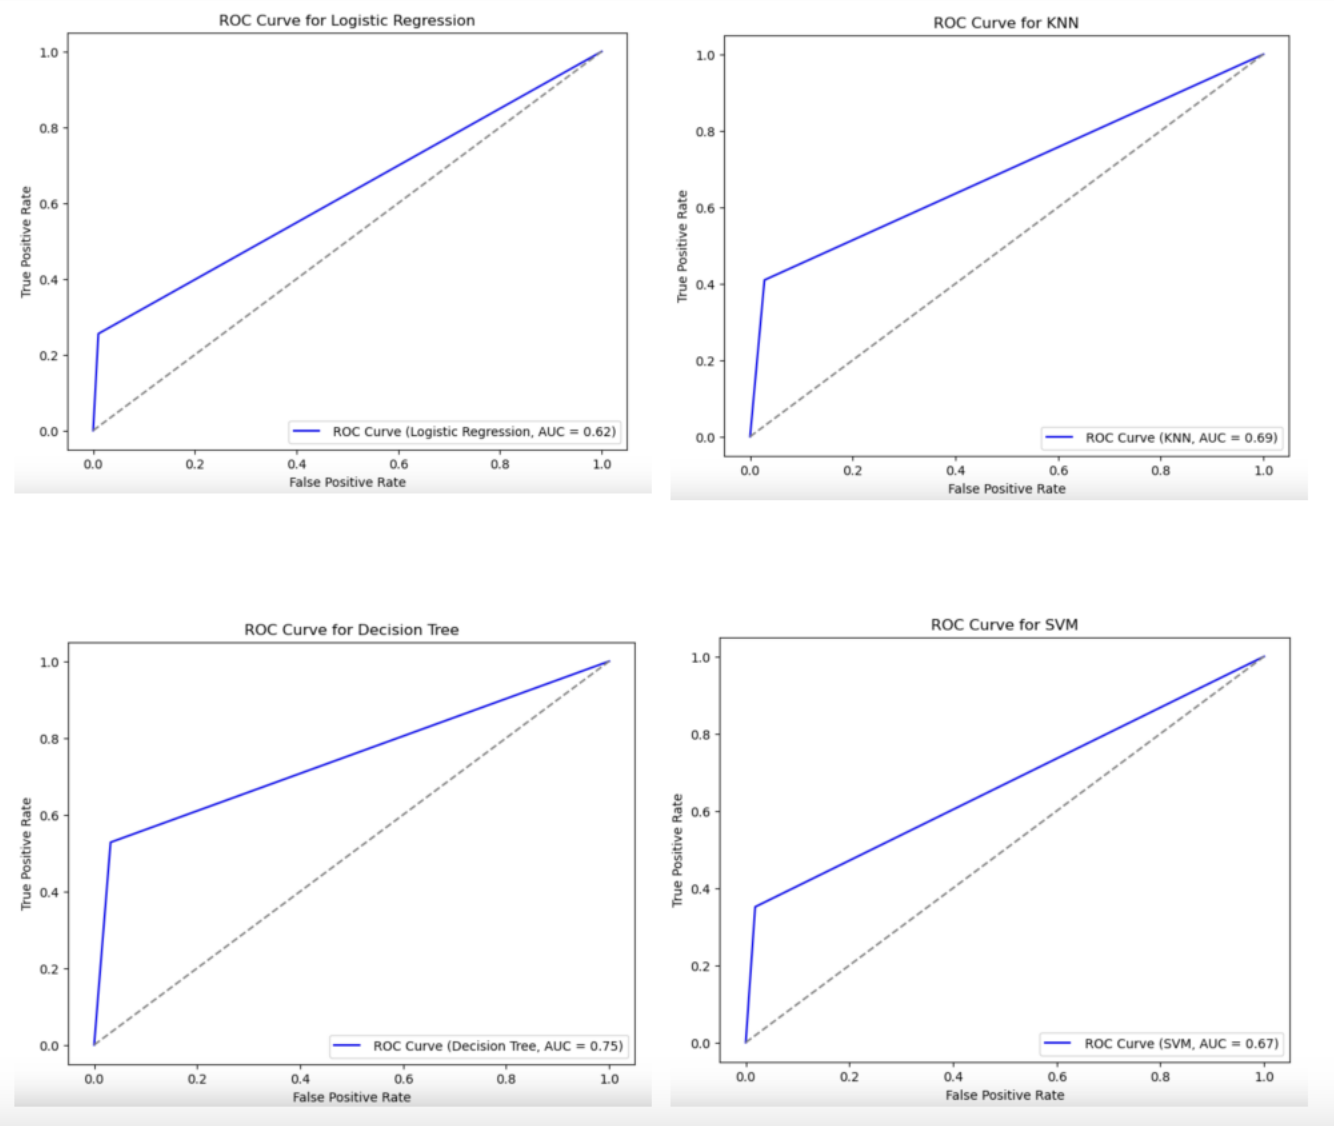

In [490]:
# Paths to your saved images
image_paths = ['images/ROC (AUC) Logistic Regression - Best Model.png', 'images/ROC (AUC) KNN - Best Model.png', 'images/ROC (AUC) Decision Tree - Best Model.png', 'images/ROC (AUC) Support Vector Classifier - Best Model.png']

# Set up a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Flatten the axes array for easy indexing
axes = axes.ravel()

# Loop over the images and display each one
for i, image_path in enumerate(image_paths):
    img = mpimg.imread(image_path)
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axes for a cleaner look

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

display(Image(filename='images/ROC Curve for All Classifier Best Model  with AUC.png'))

In [663]:
# Placeholder for the results list
results_list = []

# Loop through each classifier's results and append them as dictionaries to the list
for name, result in results.items():
    results_list.append({
        'Classifier': name,
        'Best Score': result['best_score'],
        'Mean Fit Time': result['mean_fit_time'],
        'Training Accuracy': result.get('roc_auc_train', None),
        'Testing Accuracy': result.get('roc_auc_test', None),
        'Accuracy':result.get('accuracy', None)
    })

# Convert the list of results dictionaries into a DataFrame
results_df = pd.DataFrame(results_list)

# Display the DataFrame
results_df

,Classifier,Best Score,Mean Fit Time,Training Accuracy,Testing Accuracy,Accuracy
0,Logistic Regression,0.711132,380.679248,0.609314,0.622564,0.907016
1,KNN,0.609268,1.155838,0.727114,0.690719,0.908594
2,Decision Tree,0.638549,2.577735,0.748498,0.748072,0.918548
3,SVM,0.675236,2181.729291,0.663739,0.666549,0.910779


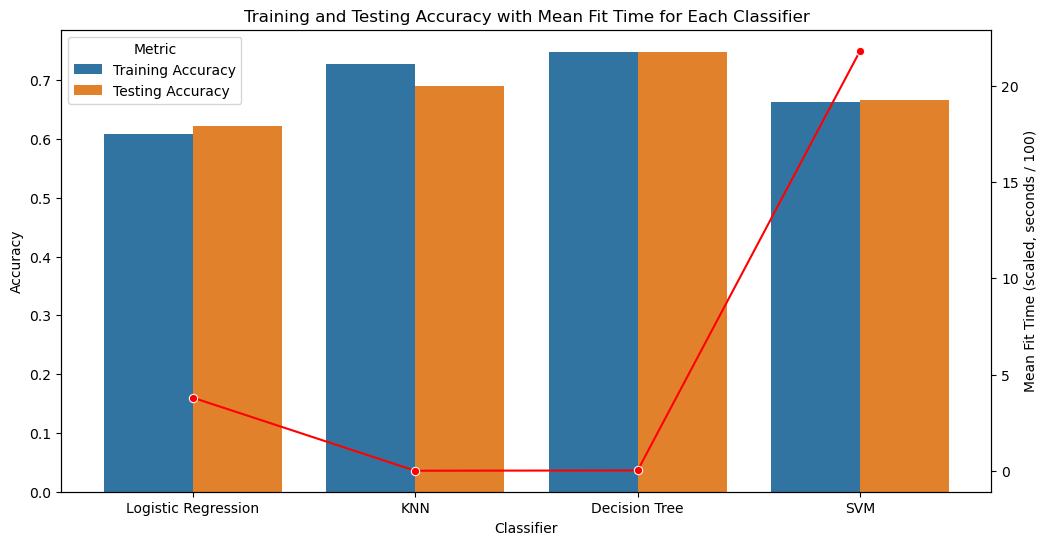

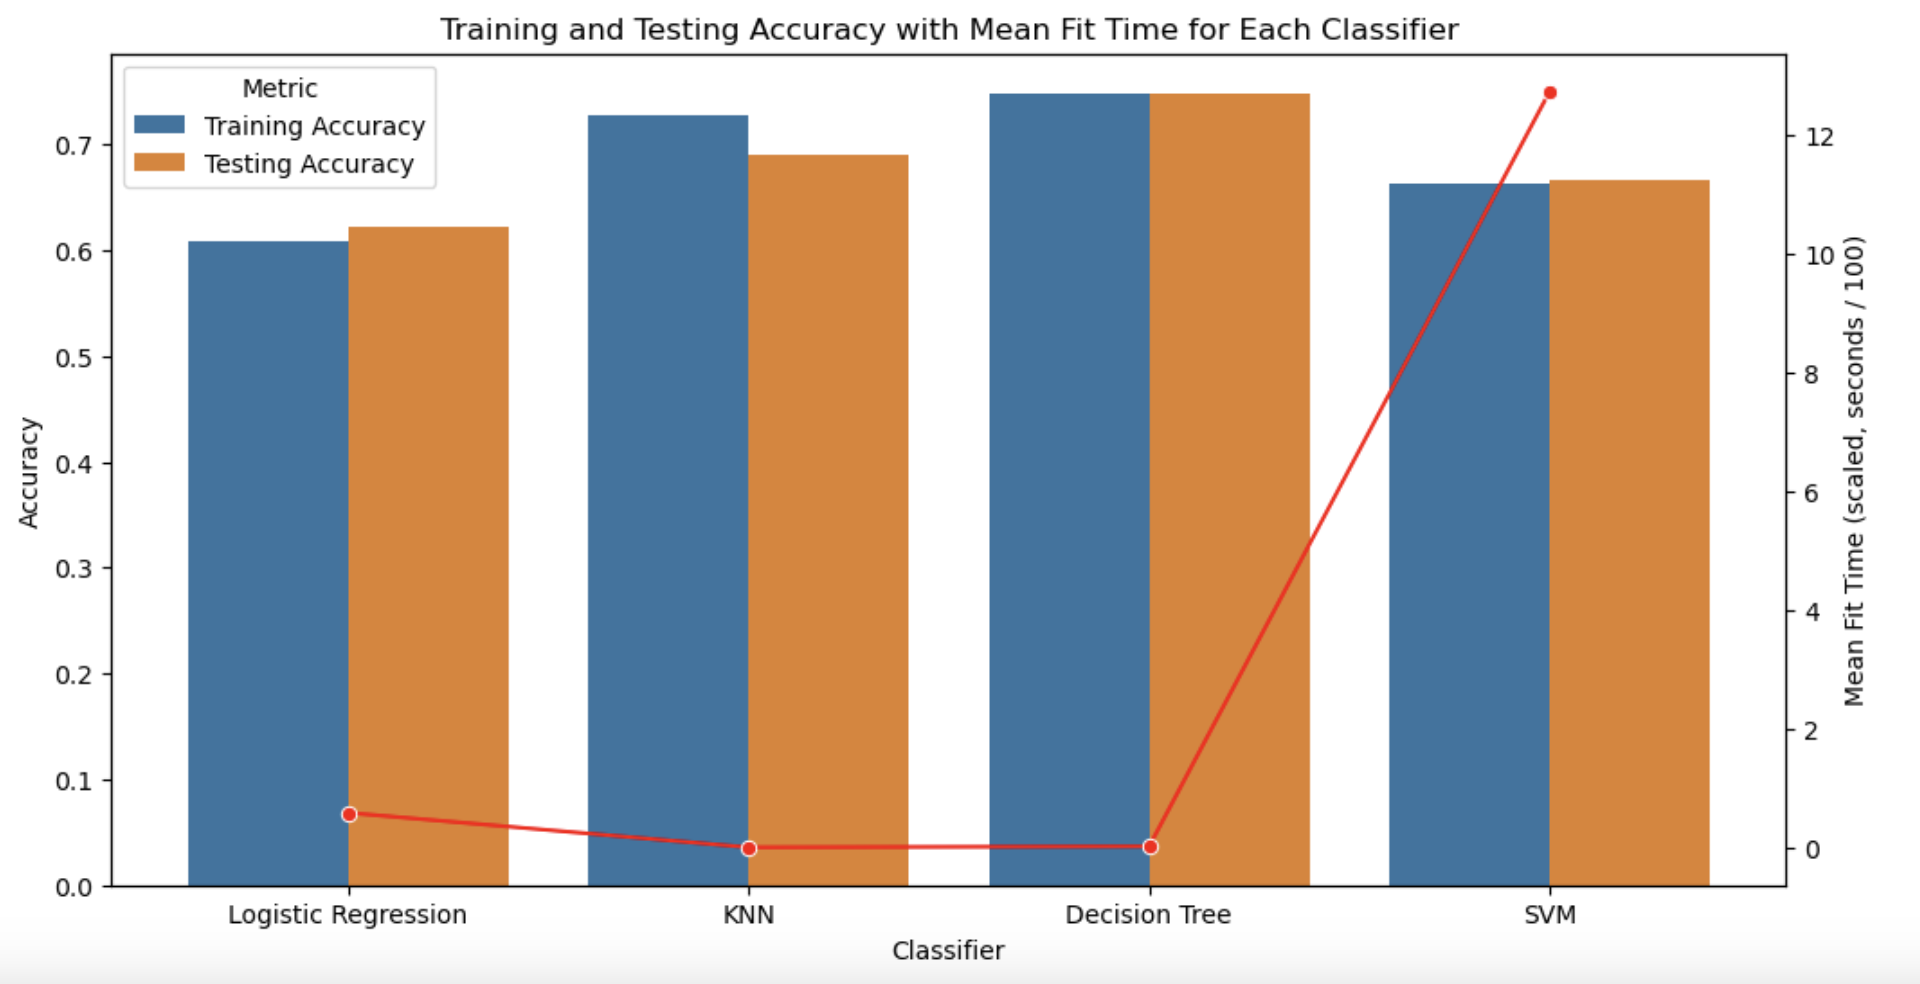

In [665]:
results_df['Mean Fit Time (scaled)'] = results_df['Mean Fit Time'] / 100 

# Melt the DataFrame to long format for Seaborn
df_melted = results_df.melt(id_vars='Classifier', value_vars=['Training Accuracy', 'Testing Accuracy'], 
                    var_name='Metric', value_name='Score')

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Training and Testing Accuracy
sns.barplot(data=df_melted, x='Classifier', y='Score', hue='Metric', ax=ax1)

# Secondary y-axis for Mean Fit Time
ax2 = ax1.twinx()  # Create a secondary y-axis sharing the same x-axis
sns.lineplot(data=results_df, x='Classifier', y='Mean Fit Time (scaled)', marker='o', color='red', ax=ax2)

# Customizing the plot
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Mean Fit Time (scaled, seconds / 100)')
ax1.set_title('Training and Testing Accuracy with Mean Fit Time for Each Classifier')
ax1.legend(title='Metric', loc='upper left')
ax2.grid(False)  # Turn off grid for secondary y-axis if not desired
plt.xticks(rotation=45)
plt.show()

display(Image(filename='images/Train and Test Accuracy Scores - All Classifiers.png'))

## Adjusting Model Performance

Based on the metrics above Decision Tree and SVC are best models. 

Considering the Grid Search best parameters of decision tree I have captured 
1) Tuned Decision Tree Model
2) Precision Score
3) ROC Curve
4) AUC

ROC and AUC will remain the same as Grid Search whcih is 75%

Train and Test precision scores are 66% and 68% respectively.

In [668]:
#svmModel = SVC(kernel='rbf', C=1, gamma='auto', class_weight='balanced', probability=True)

In [670]:
decisionTree = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=1)

In [672]:
#model = svmModel
#name = 'SVC'

model = decisionTree
name = 'Decision Tree'
pipe = Pipeline(steps = [
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print(f'Precision Score for TRAINING set is: {precision_score(y_train, y_train_pred):.2%}')
print(f'Precision Score for TEST set is: {precision_score(y_test, y_test_pred):.2%}')

Precision Score for TRAINING set is: 65.67%
Precision Score for TEST set is: 67.77%


In [219]:
#y_train_pred_proba = pipe.predict_proba(X_train)[:, 1]
#y_test_pred_proba = pipe.predict_proba(X_test)[:, 1]

In [245]:
#y_train_pred = (y_train_pred_proba >= 0.5).astype(int)
#y_test_pred = (y_test_pred_proba >= 0.5).astype(int)

#print(f'Precision Score for TRAINING set using predict_proba is: {precision_score(y_train, y_train_pred):.2%}')
#print(f'Precision Score for TEST set using predict_proba is: {precision_score(y_test, y_test_pred):.2%}')

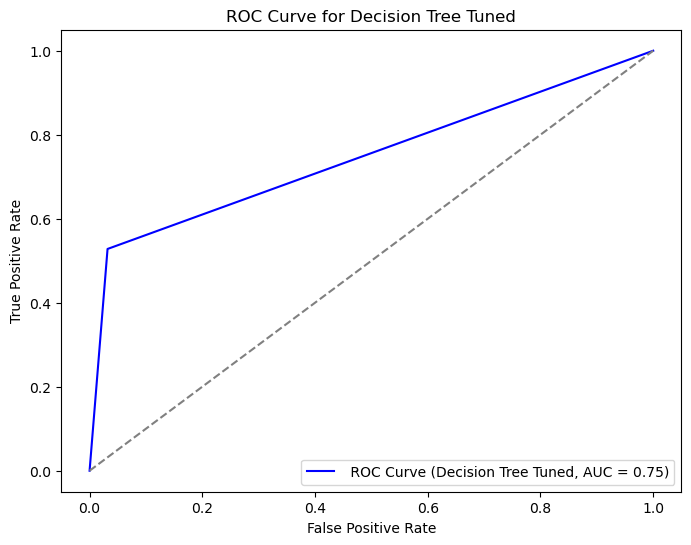

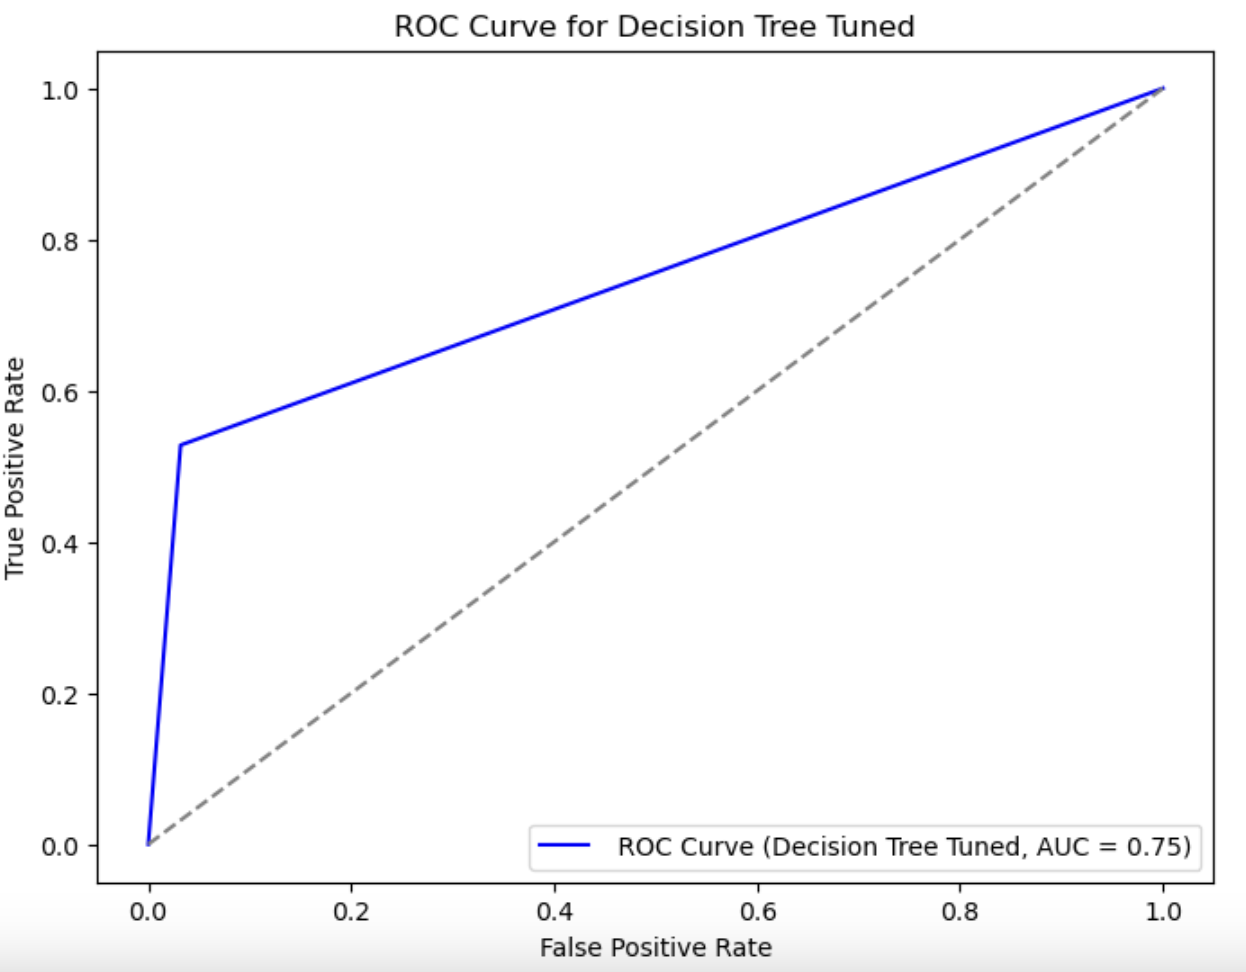

In [674]:
# AUC and ROC for Training and Test
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train) 
    
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)


#Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='blue', label=f' ROC Curve ({name} Tuned, AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve for {name} Tuned")
plt.legend(loc="lower right")
plt.show()

display(Image(filename='images/ROC Curve for Decision Tree Tuned.png'))

##### Questions

Through out this exercise I have been using roc_curve, auc library for the measuring the scores. 
Based on that Decision Tree performed better and second best is the SVC. 

**Exploring Different ROC Curve Libraries**

What is the difference between RocCurveDisplay and roc_curve, auc libraries? 

Using RocCurveDisplay I got a score of 94% for SVC and 93% for Decision Tree. 
For this SVC performed better slightly that the Decision Tree.

And this result is more in line with the scores presented in the CRIS-DM-BANK.pdf file.

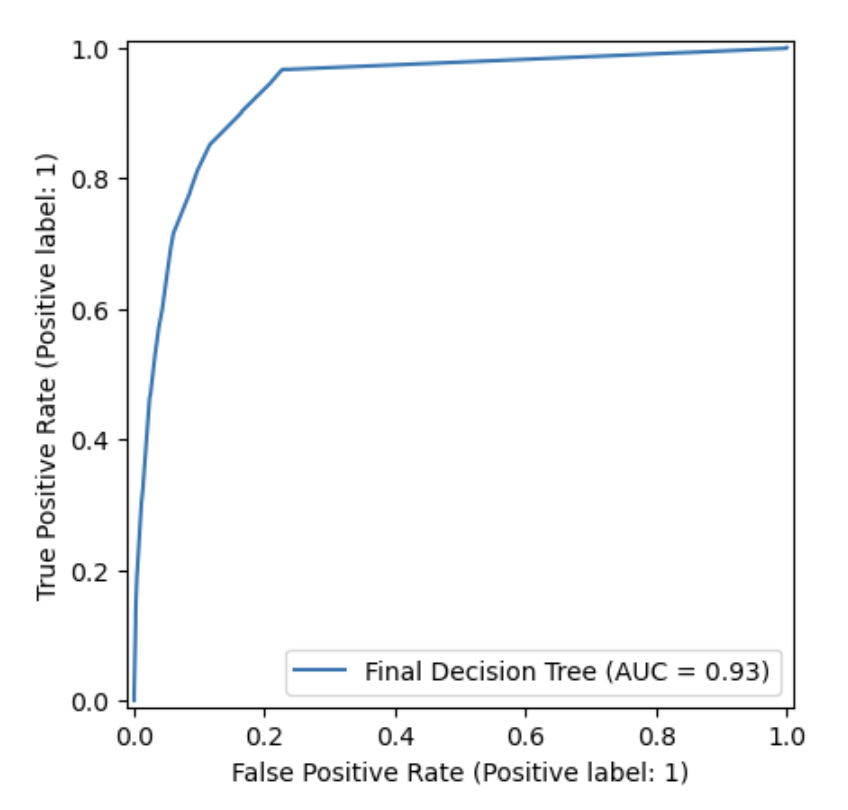

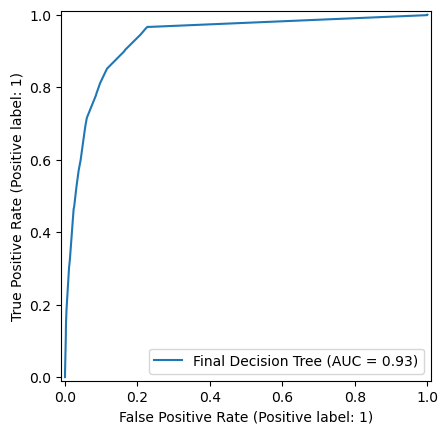

In [676]:
#RocCurveDisplay.from_estimator(pipe, X_test, y_test, name = 'Final SVC')
RocCurveDisplay.from_estimator(pipe, X_test, y_test, name = 'Final Decision Tree')

display(Image(filename='images/RocCurveDisplay for Decision Tree.png'))

**Remove High Correlated Fields & Model**

Looking at the heat map there are strong correlation between 'euribor3m','emp.var.rate','cons.price.idx', 'nr.employed'. Using just 'euribor3m' will be a representative of other fields. 

Also 'poutcome' does not add any value, 83% customers were never contacted before. So this field also does not add any value.

Removing these columns would it give different results?